In [0]:
import numpy as np

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
#@title Width and Height Calculator
def calcWidthAndHeight(digit):
  minX = 100
  minY = 100
  maxX = -1
  maxY = -1

  for i in range(28):
    for j in range(28):
      if (not digit[i][j] == 0):
        if (i > maxY):
          maxY = i
        if (i < minY):
          minY = i
        if (j > maxX):
          maxX = j
        if (j < minX):
          minX = j

  return (maxX - minX + 1),(maxY - minY + 1)

In [0]:
#@title Breadth First Search to find White Regions
def BFS(img):
  visited = np.zeros((28,28))

  x,y = findWhitePoint(img, visited)
  queue = [[x,y]]

  cc = 1

  while queue:
    pos = queue.pop(0)
    i = pos[0]
    j = pos[1]
    if visited[i][j] == 1:
      continue
    visited[i][j] = 1

    queue = findEdges(i, j, img, queue, visited)
    queue = removeVisited(queue,visited)

    if not queue:
      x,y = findWhitePoint(img, visited)
      if (x == -1):
        continue
      else:
        cc += 1
        queue = [[x,y]]

  return cc

In [0]:
#@title BFS Helper - finding a white point
def findWhitePoint(img,visited):
  for i in range(28):
    for j in range (28):
      if (img[i][j] == 0 and visited[i][j] == 0):
        return i,j
  return -1,-1

In [0]:
#@title BFS Helper - finding the edges to a point
def findEdges(i, j, img, queue, visited):
  #all 8 directions from a point is an edge
  #if that point is white, add it to the queue
  
  iP = i - 1
  jP = j
  if ((iP >= 0)) and (np.absolute(i - iP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i + 1
  jP = j
  if ((iP < 28)) and (np.absolute(i - iP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i
  jP = j - 1
  if ((jP >= 0)) and (np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i
  jP = j + 1
  if ((jP < 28)) and (np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i + 1
  jP = j + 1
  if ((iP < 28) and (jP < 28)) and (np.absolute(i - iP) <= 1 and np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i - 1
  jP = j + 1
  if ((iP >= 0) and (jP < 28)) and (np.absolute(i - iP) <= 1 and np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i + 1
  jP = j - 1
  if ((iP < 28) and (jP >= 0)) and (np.absolute(i - iP) <= 1 and np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  iP = i - 1
  jP = j - 1
  if ((iP >= 0) and (jP >= 0)) and (np.absolute(i - iP) <= 1 and np.absolute(j - jP) <= 1) and (visited[iP][jP] == 0) and (img[iP][jP] == 0) and ([iP,jP] not in queue):
    queue.append([iP,jP])

  return queue

In [0]:
#@title BFS Helper - removing visited points from the queue
def removeVisited(queue, visited):
  if not queue:
    return

  removeList = []
  for i in range(len(queue)):
    x = queue[i][0]
    y = queue[i][1]

    if visited[x][y] == 1:
      removeList.append(i)

  removeList.reverse()
  for i in range(len(removeList)):
    queue.pop(removeList[i])

  return queue

In [0]:
#@title Average Intensity Calculator
def calcAverageIntensity(digit):
  avgInt = 0
  for i in range(28):
    for j in range(28):
      avgInt += digit[i][j]
  avgInt = float(avgInt)
  return avgInt / (28*28)

In [0]:
numImages = len(train_images)
hcFeatures =[]

for i in range(numImages):
  digit = train_images_original[i]

  width, height = calcWidthAndHeight(digit)
  cc = BFS(digit)
  avgInt = calcAverageIntensity(digit)

  features = np.array([width,height,cc,avgInt])

  hcTrain = np.concatenate((train_images[i],features), axis=0)
  hcFeatures.append(hcTrain)

hcFeatures = np.array(hcFeatures)

In [0]:
#add features to test images
numImages = len(test_images)
hcTestImages = []
for i in range(numImages):
  digit = test_images_original[i]

  width, height = calcWidthAndHeight(digit)
  cc = BFS(digit)
  avgInt = calcAverageIntensity(digit)

  features = np.array([width,height,cc,avgInt])

  hcTest = np.concatenate((test_images[i],features), axis=0)
  hcTestImages.append(hcTest)

hcTestImages = np.array(hcTestImages)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape = (28*28+len(features),)))
network.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7890      
Total params: 7,890
Trainable params: 7,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 20
history = network.fit(hcFeatures, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(hcTestImages, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 1s 25us/step - loss: 0.6273 - acc: 0.8372 - val_loss: 0.3156 - val_acc: 0.9125
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2912 - acc: 0.9194 - val_loss: 0.2586 - val_acc: 0.9273
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2541 - acc: 0.9287 - val_loss: 0.2397 - val_acc: 0.9339
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2357 - acc: 0.9336 - val_loss: 0.2309 - val_acc: 0.9365
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2245 - acc: 0.9360 - val_loss: 0.2179 - val_acc: 0.9383
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2164 - acc: 0.9386 - val_loss: 0.2145 - val_acc: 0.9414
Epoch 7/20
60000/60000 [==

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

In [0]:
import matplotlib.pyplot as plt

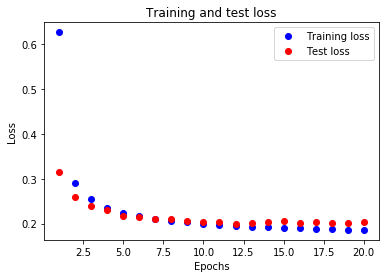

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

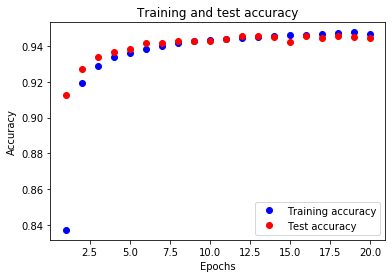

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()